In [1]:
import numpy as np    
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
sns.set(context="notebook",palette="Spectral",style='darkgrid',color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import math
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import scipy.stats as stats
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [2]:
df=pd.read_csv('C:\\Users\\Divya\\OneDrive\\Desktop\\Predictive Modelling Project\\cubic_zirconia.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.shape

(26967, 11)

In [5]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [7]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967,NaN,NaN,NaN,13484,7784.85,1,6742.5,13484,20225.5,26967
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8


* There are 26967 rows and 11 columns in the dataset.

* Out of 11 columns, the variables 'cut','clarity','color' are of object datatype. The remaining variables are of float64 and int64 datatypes.

* There are 697 missing values in variable 'depth'.

* The minimum value of variables 'x','y','z' is zero. It cannot be true since the dimensions of a diamond cannot be zero. Hence they are faulty values.

* There are 5 unique values in variable 'cut' with 'Ideal' type of cut being the top one with frequency of 10816 out of 26967 rows.

* There are 7 unique values in variable 'color' with G being the most repeated one with frequency of 5661. The variable 'Color' indicates the color of the cubic zirconia with label D being the worst and J the best.

* There are 8 unique values in variable 'clarity' with 'Sl1' being the most repeated one with frequency of 6571. The variable 'clarity' refers to the absence of the inclusions and blemishes in cubic zirconia. There are rankings for this variable types (In order from Worst to Best) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1.

* From the above table, the average carat weight and depth of cubic zirconia are 0.79 and 61.74 respectively.

* The average price of cubic zirconia is 3939.52. The average length, width and height are 5.7,5.7 and 3.53 respectively.

* Looks like there are outliers in the data.

In [10]:
# drop the serial no column 

df = df.drop('Unnamed: 0', axis=1)

The variable 'Unnamed:0' has no significance or impact on target variable 'price'. Hence dropped the column 'Unnamed:0'.

In [11]:
# checking the columns after dropping index

df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [69]:
# Checking for duplicates before and after

print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26925, 10)
After (26925, 10)


Looks like there are 34 duplicate rows in the dataset. Hence dropped the duplicate values.

# EDA:

In [13]:
# Let's check the skewness values quantitatively

df.skew().sort_values(ascending=True)

depth   -0.026086
x        0.392290
table    0.765805
carat    1.114789
price    1.619116
z        2.580665
y        3.867764
dtype: float64

# Univariate Analysis:

# carat:

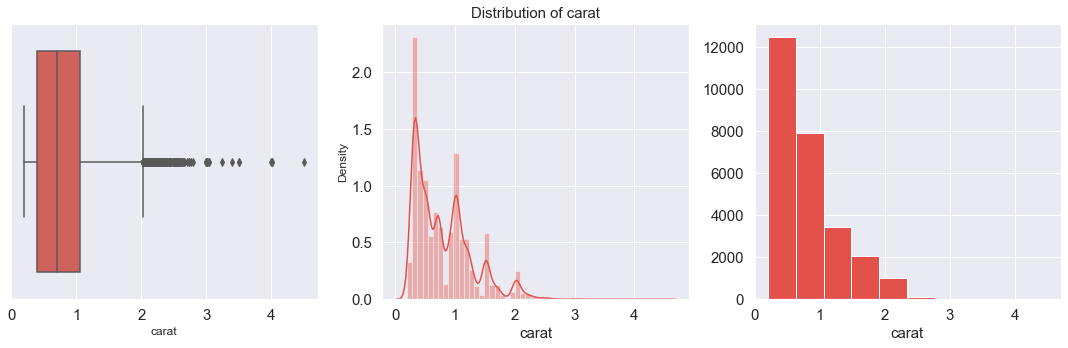

In [15]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='carat',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['carat'],ax=ax2)
ax2.set_xlabel('carat', fontsize=15)
ax2.set_title('Distribution of carat', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['carat'])
ax3.set_xlabel('carat', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'carat' is positively skewed at 1.114789. There are outliers in the variable. The distribution of carat ranges from 0.2 to 4.5.

# depth:

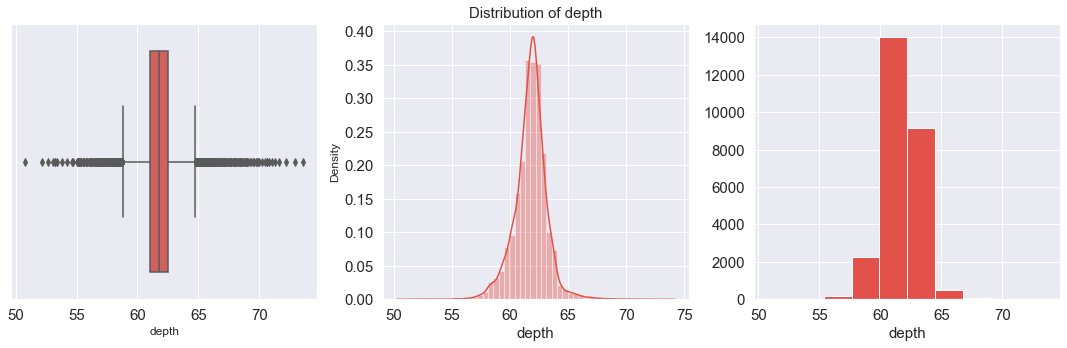

In [16]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='depth',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['depth'],ax=ax2)
ax2.set_xlabel('depth', fontsize=15)
ax2.set_title('Distribution of depth', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['depth'])
ax3.set_xlabel('depth', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'depth' is negatively skewed at -0.026086. There are outliers in the variable. The distribution of depth ranges from 50.8 to 73.6.

# table:

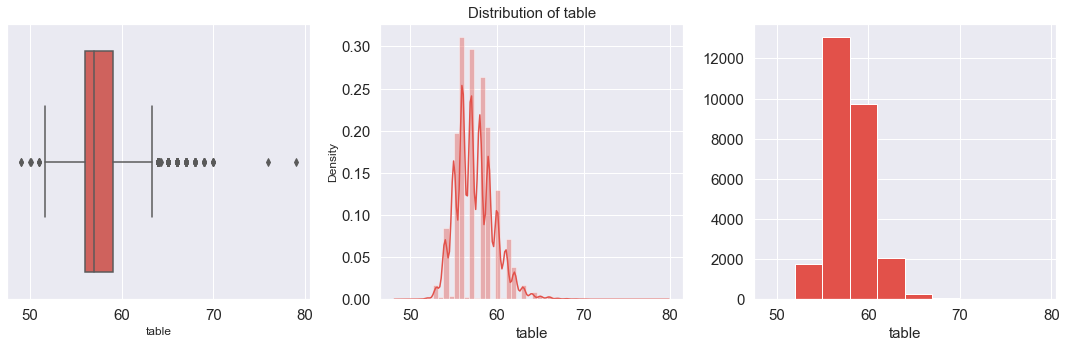

In [17]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='table',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['table'],ax=ax2)
ax2.set_xlabel('table', fontsize=15)
ax2.set_title('Distribution of table', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['table'])
ax3.set_xlabel('table', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'table' is positively skewed at 0.765805. There are outliers in the variable. The distribution of table ranges from 49 to 79.

# x:

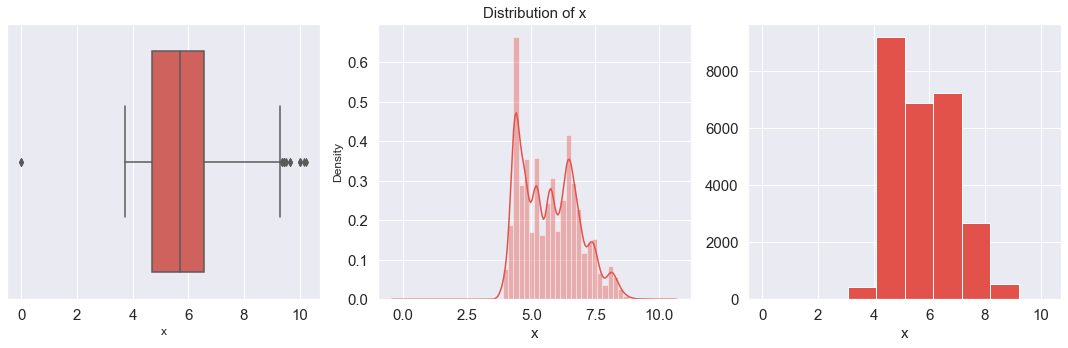

In [18]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='x',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['x'],ax=ax2)
ax2.set_xlabel('x', fontsize=15)
ax2.set_title('Distribution of x', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['x'])
ax3.set_xlabel('x', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'x' is positively skewed at 0.392290. There are outliers in the variable. The distribution of x ranges from 0 to 10.23.

# y:

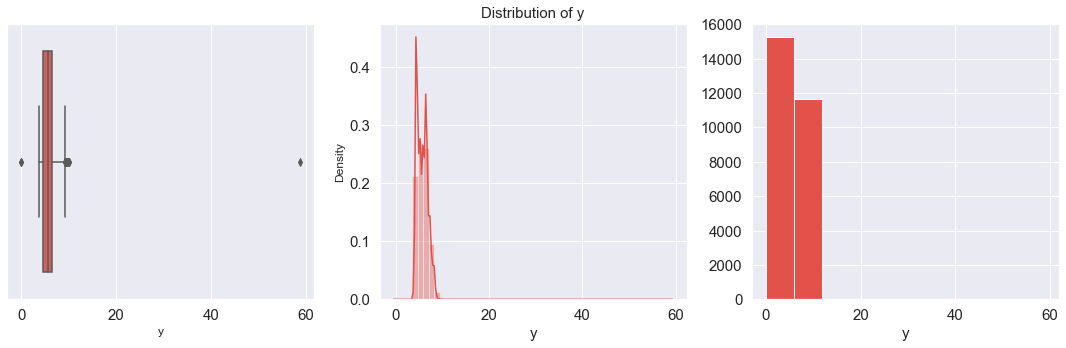

In [19]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='y',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['y'],ax=ax2)
ax2.set_xlabel('y', fontsize=15)
ax2.set_title('Distribution of y', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['y'])
ax3.set_xlabel('y', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'y' is positively skewed at 3.867764. There are outliers in the variable. The distribution of y ranges from 0 to 58.9.

# z:

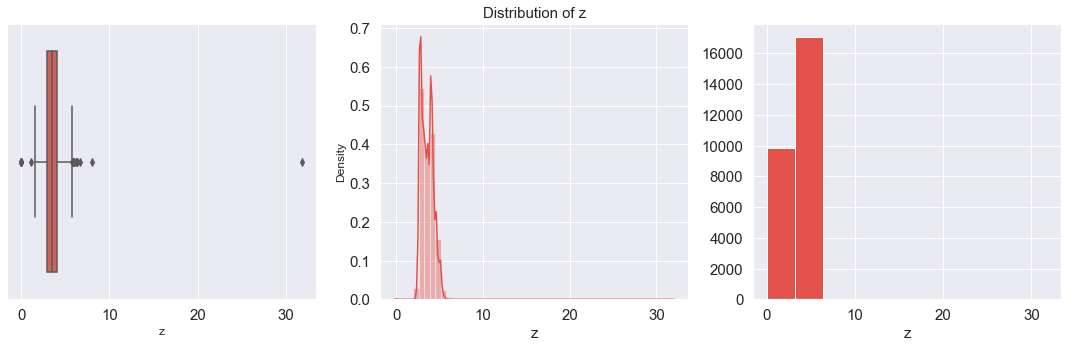

In [20]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='z',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['z'],ax=ax2)
ax2.set_xlabel('z', fontsize=15)
ax2.set_title('Distribution of z', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['z'])
ax3.set_xlabel('z', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'z' is positively skewed at 2.580665. There are outliers in the variable. The distribution of z ranges from 0 to 31.8.

# price:

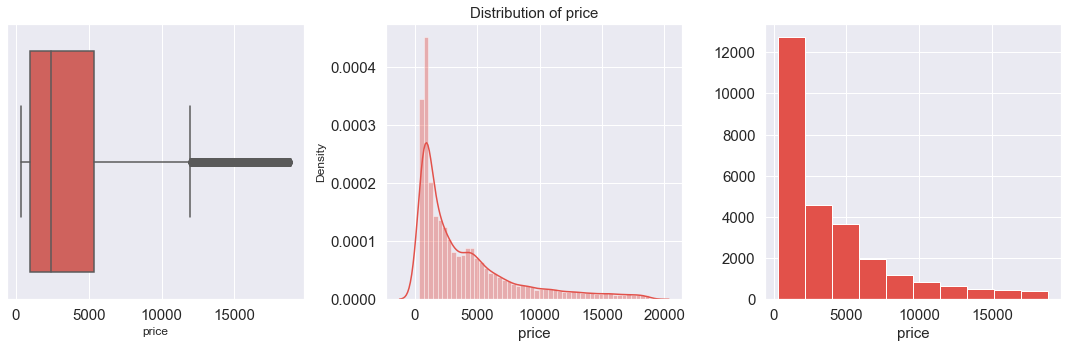

In [22]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='price',data=df,orient='v',ax=ax1)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['price'],ax=ax2)
ax2.set_xlabel('price', fontsize=15)
ax2.set_title('Distribution of price', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['price'])
ax3.set_xlabel('price', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

The variable 'price' is positively skewed at 1.619116. There are outliers in the variable. The distribution of price ranges from 326 to 18818.

# Categorical variables:

# Cut:

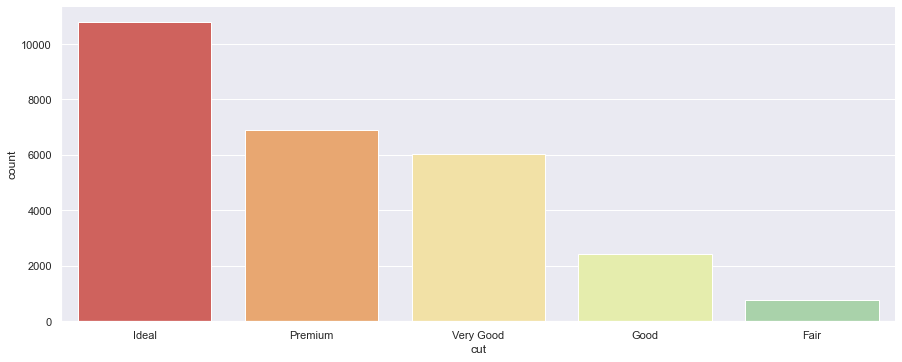

In [24]:
sns.catplot('cut', data=df, kind='count', aspect=2.5)

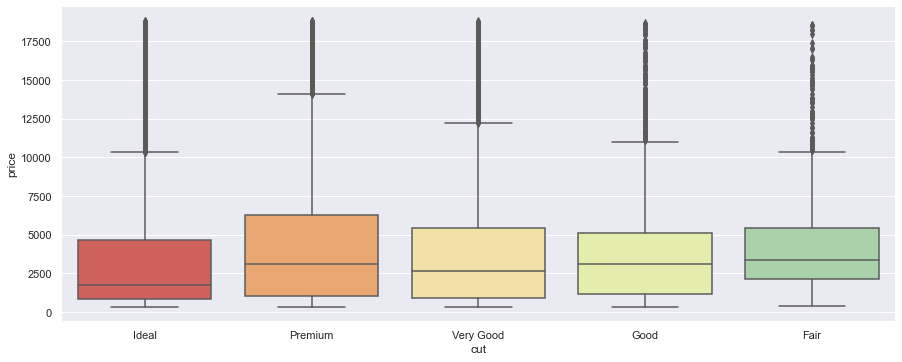

In [25]:
sns.catplot(x='cut', y='price', kind='box', data=df, aspect=2.5)

The 'Premium' cut of diamonds are the most expensive followed by 'Very Good cut'.

# Color:

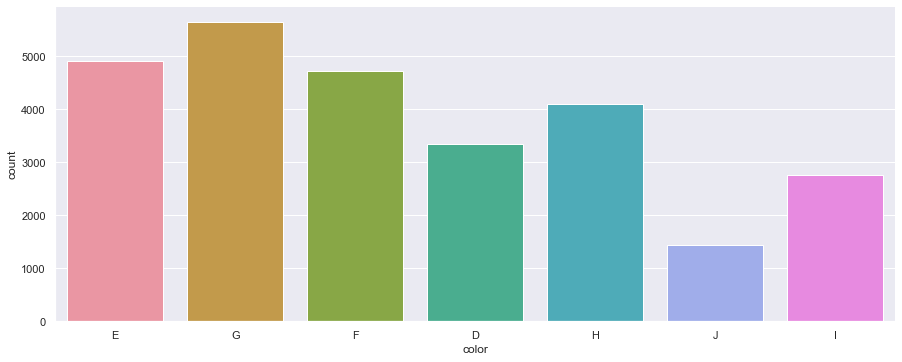

In [25]:
sns.catplot('color', data=df, kind='count',aspect=2.5)

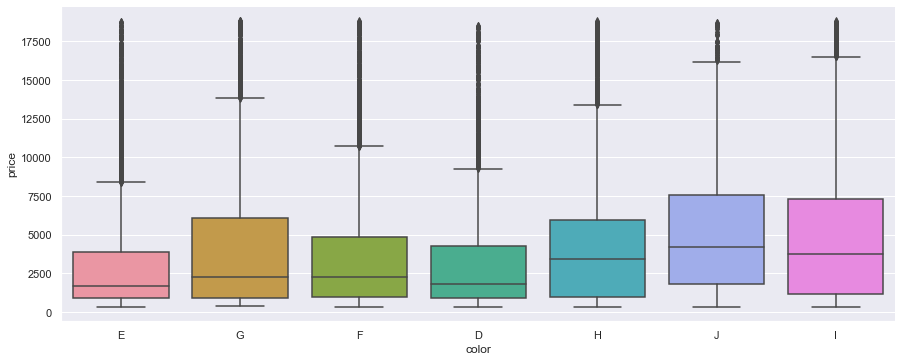

In [26]:
sns.catplot(x='color', y='price', kind='box', data=df, aspect=2.5)

Diamonds with color 'J' are the most expensive followed by color 'I'. 

# Clarity:

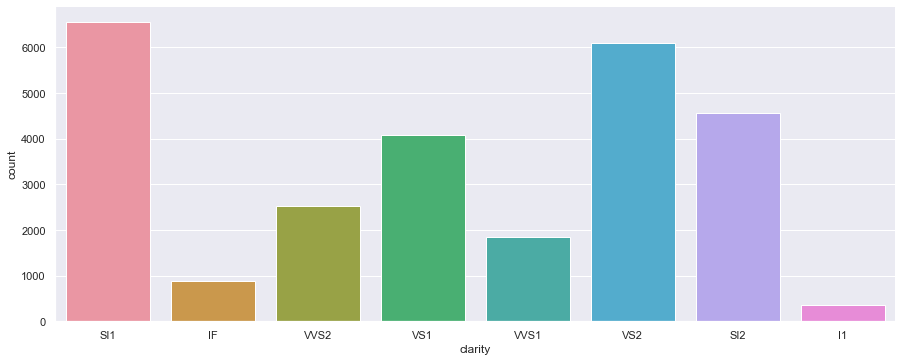

In [27]:
sns.catplot('clarity', data=df, kind='count',aspect=2.5)

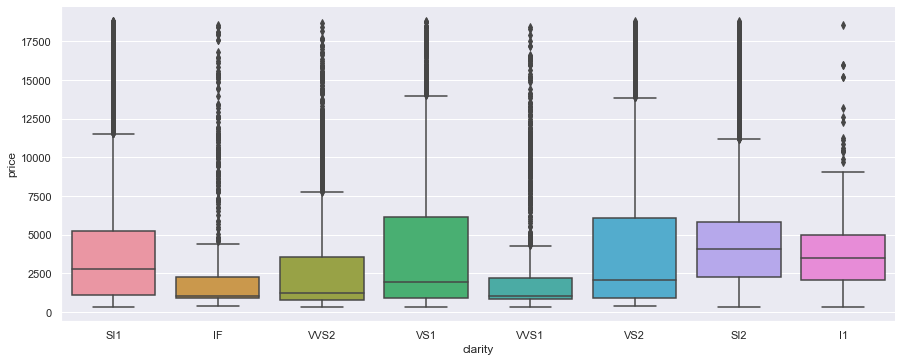

In [28]:
sns.catplot(x='clarity', y='price', kind='box', data=df, aspect=2.5)

The Diamonds of VS1 & VS2 type of clarity are the most expensive followed by SI2 and SI1.

# Bivariate Analysis:

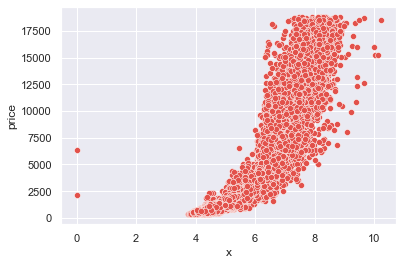

In [26]:
sns.scatterplot(x='x', y='price', data=df)
plt.ticklabel_format(style='plain', axis='x')

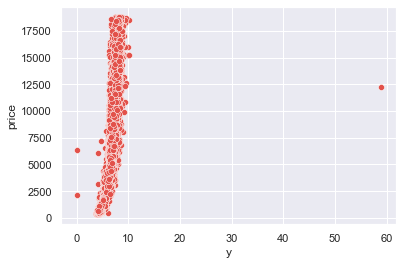

In [27]:
sns.scatterplot(x='y', y='price', data=df)
plt.ticklabel_format(style='plain', axis='x')

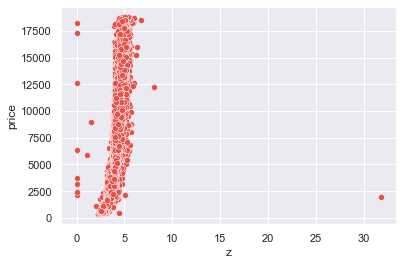

In [28]:
sns.scatterplot(x='z', y='price', data=df)
plt.ticklabel_format(style='plain', axis='x')

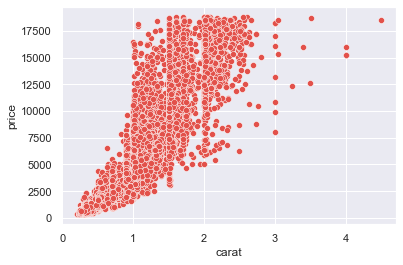

In [29]:
sns.scatterplot(x='carat', y='price', data=df)
plt.ticklabel_format(style='plain', axis='x')

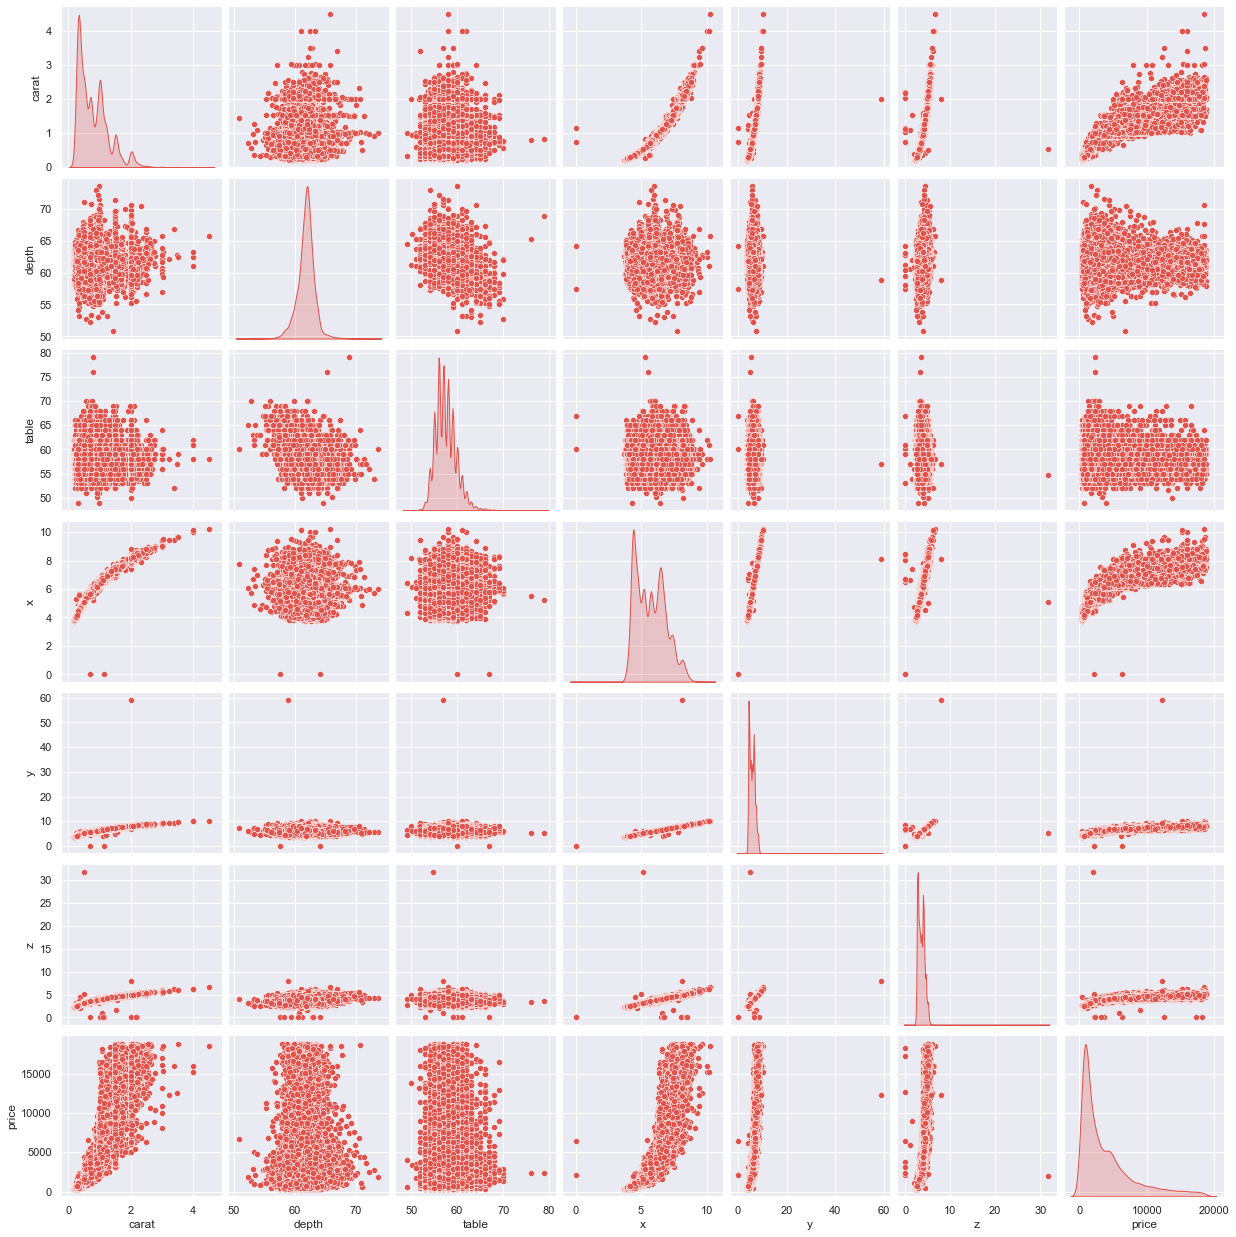

In [30]:
sns.pairplot(data=df,diag_kind='kde')
plt.show()

# Multivariate Analysis:

In [14]:
corr = df.corr()
round(corr,2)

,carat,depth,table,x,y,z,price
carat,1.00,0.04,0.18,0.98,0.94,0.94,0.92
depth,0.04,1.00,-0.30,-0.02,-0.02,0.10,-0.00
table,0.18,-0.30,1.00,0.20,0.18,0.15,0.13
x,0.98,-0.02,0.20,1.00,0.96,0.96,0.89
y,0.94,-0.02,0.18,0.96,1.00,0.93,0.86
z,0.94,0.10,0.15,0.96,0.93,1.00,0.85
price,0.92,-0.00,0.13,0.89,0.86,0.85,1.00


<AxesSubplot:>

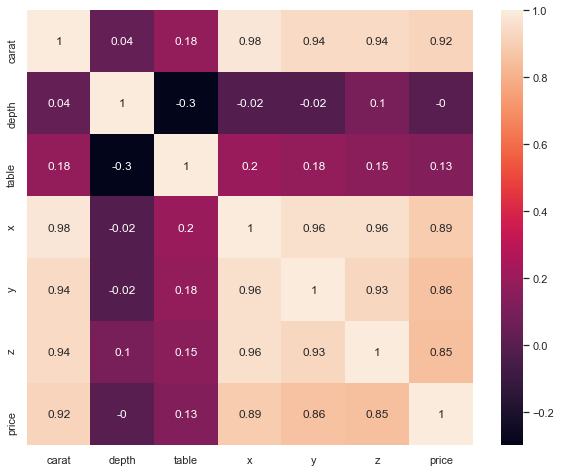

In [32]:
fig_dims = (10, 8)
fig = plt.subplots(figsize=fig_dims)
sns.heatmap(round(corr,2), annot=True)

* From the EDA, it is understood that, there is a good correlation among variables 'x','y','z'.

* The variables 'x','y','z' also have good correlation with target variable 'price'.

* The variable 'carat' has strong correlation with variables 'x','y','z'. It means length, width and height of cubic zirconia stones have direct impact on its carat weight.

* Also the variable 'carat' has strong correlation with variable 'price' meaning which more the carat weight of cubic zirconia, more the price of the stones.

* The variable 'depth' has weak or almost no correlation with all the variables in the dataset. It means depth of the zirnocia stones has no significance in deciding the price or any other quality of the stones.

# Missing value Imputation:

In [15]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

There are 697 missing values in the variable 'depth'. Since there are outliers in the variable, it is safer and better to impute the null values with median of variable 'depth'.

In [16]:
df.median()

carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.70
z           3.52
price    2375.00
dtype: float64

In [17]:
#lets replace the missing values with median value. 

df = df.fillna(df.median())

In [18]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [19]:
df[df.isin([0])].stack(0)

5821   x    0
       y    0
       z    0
6034   z    0
10827  z    0
12498  z    0
12689  z    0
17506  x    0
       y    0
       z    0
18194  z    0
23758  z    0
dtype: object

In [20]:
# Checking for the values which are equal to zero in variables x,y,z.

print("Number of rows with x == 0: {} ".format((df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((df.z==0).sum()))

Number of rows with x == 0: 2 
Number of rows with y == 0: 2 
Number of rows with z == 0: 8 


Variables 'x', 'y', 'z' are dimensions of the cubic zirconia stones. Hence the value zero indicates no meaning. A diamond or any stone cannot be dimensionless. Since these variables are highly correlated with carat, the rows with zero value have been dropped for further analysis.

In [21]:
# Dropping the rows with zero value.

df.drop(df[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))].index, inplace=True)

In [22]:
# Checking for the values which are equal to zero in variables x,y,z.

print("Number of rows with x == 0: {} ".format((df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((df.z==0).sum()))

Number of rows with x == 0: 0 
Number of rows with y == 0: 0 
Number of rows with z == 0: 0 


From the EDA of categorical variables like 'cut', 'color' and 'clarity', it is evident that there is very minimal price difference between certain sub levels. For example, 

* The price difference between 'Good' and 'Very Good Cut' is very less. 
* The price difference between diamonds with color 'J' and color 'I' is very less.
* The Diamonds of VS1 & VS2 type of clarity are the most expensive and also there is not much price difference between both the clarity types. There is not much price difference between diamonds of 'IF' and 'VVS1' clarity types also.

We can combine these sub levels and see how the model responds to it. However, since each sub level has its own significance and charateristics and the distance between each sub level is not known, I have decided not to combine them.

The business might have segmented these variables into different sub levels on the basis of certain parameters. Since we are not aware of those parameters, it is always better to discuss with business before combining these sub levels.

# Unique counts of ordinal variables:

In [23]:
# Unique counts of 3 ordinal variables

print('cut\n',df.cut.value_counts())
print('\n')
print('color\n',df.color.value_counts())
print('\n')
print('clarity\n',df.clarity.value_counts())
print('\n')

cut
 Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64


color
 G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
 SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64




# Data Encoding:

In [24]:
# Converting objects to categorical codes

df['cut']=np.where(df['cut'] =='Ideal', '4', df['cut'])
df['cut']=np.where(df['cut'] =='Premium', '3', df['cut'])
df['cut']=np.where(df['cut'] =='Very Good', '2', df['cut'])
df['cut']=np.where(df['cut'] =='Good', '1', df['cut'])
df['cut']=np.where(df['cut'] =='Fair', '0', df['cut'])

In [25]:
df['color']=np.where(df['color'] =='D', '0', df['color'])
df['color']=np.where(df['color'] =='E', '1', df['color'])
df['color']=np.where(df['color'] =='F', '2', df['color'])
df['color']=np.where(df['color'] =='G', '3', df['color'])
df['color']=np.where(df['color'] =='H', '4', df['color'])
df['color']=np.where(df['color'] =='I', '5', df['color'])
df['color']=np.where(df['color'] =='J', '6', df['color'])

In [26]:
df['clarity']=np.where(df['clarity'] =='IF', '0', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS1', '1', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS2', '2', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS1', '3', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS2', '4', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI1', '5', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI2', '6', df['clarity'])
df['clarity']=np.where(df['clarity'] =='I1', '7', df['clarity'])

In [27]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [28]:
#converting the'cut','color','clarity' column from object / string type to float.

df['cut'] = df['cut'].astype('float64')
df['color'] = df['color'].astype('float64')
df['clarity'] = df['clarity'].astype('float64')

In [29]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,1.0,5.0,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3.0,3.0,0.0,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2.0,1.0,2.0,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,4.0,2.0,3.0,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,4.0,2.0,1.0,60.4,59.0,4.35,4.43,2.65,779


# Checking for outliers:

In [30]:
df_num=df[['carat','depth','table','x','y','z','price']]

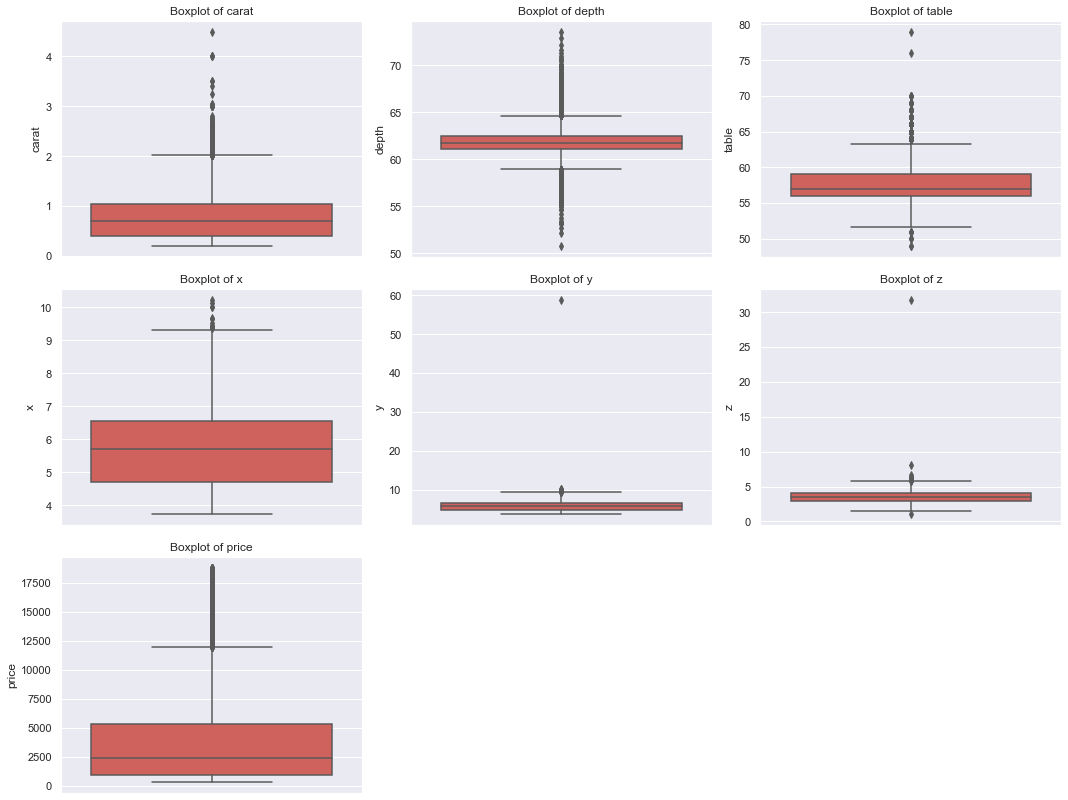

In [31]:
plt.figure(figsize = (15,15))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

# Removing outliers:

In [32]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [33]:
for i in feature_list:
    LL, UL = remove_outlier(df_num[i])
    df_num[i] = np.where(df_num[i] > UL, UL, df_num[i])
    df_num[i] = np.where(df_num[i] < LL, LL, df_num[i])

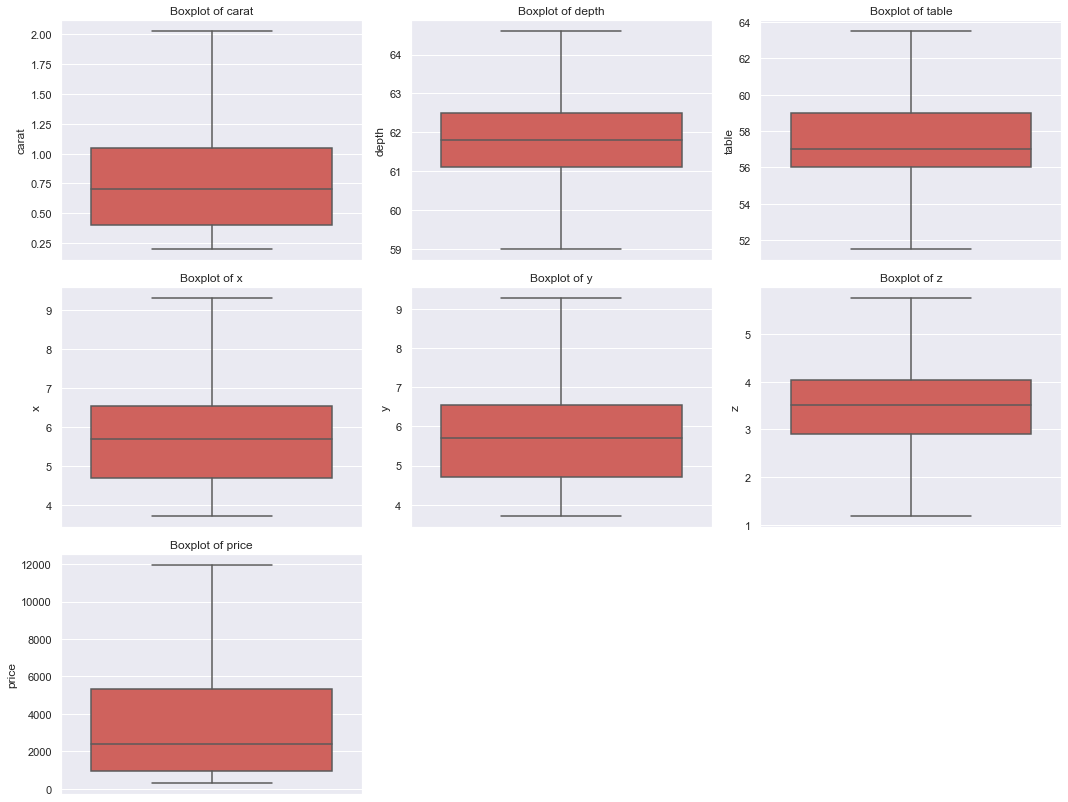

In [34]:
plt.figure(figsize = (15,15))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [35]:
df_lr=df.copy()

# Train-Test Split:

In [36]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe.This is the dependent variable
y = df[['price']]

X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4.0,1.0,5.0,62.1,58.0,4.27,4.29,2.66
1,0.33,3.0,3.0,0.0,60.8,58.0,4.42,4.46,2.70
2,0.90,2.0,1.0,2.0,62.2,60.0,6.04,6.12,3.78
3,0.42,4.0,2.0,3.0,61.6,56.0,4.82,4.80,2.96
4,0.31,4.0,2.0,1.0,60.4,59.0,4.35,4.43,2.65


In [37]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [38]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [39]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 11054.457219364167
The coefficient for cut is 107.38879266653693
The coefficient for color is -329.6026406281953
The coefficient for clarity is -502.9591100351078
The coefficient for depth is -84.34477277815323
The coefficient for table is -35.57555822490976
The coefficient for x is -951.975419286814
The coefficient for y is 6.672990548424424
The coefficient for z is -42.13557708608121


From the above coefficients for each of the independent attributes we can conclude

The one unit increase in carat increases price by 11054.457.

The one unit increase in cut increases price by 107.388.

The one unit increase in color decreases price by -329.602.

The one unit increase in clarity decreases price by -502.959.

The one unit increase in depth decreases price by -84.344.

The one unit increase in table decreases price by -35.575.

The one unit increase in x decreases price by -951.975.

The one unit increase in y increases price by 6.672.

The one unit increase in z decreases price by -42.135.

In [40]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 10464.41229507241


In [41]:
 # R square on training data
    
regression_model.score(X_train, y_train)

0.9079853166461038

90% of the variation in the price of cubic zirconia stones is explained by the predictors in the model for training set.

In [42]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

# R square on testing data
regression_model.score(X_test, y_test)

0.90961736882177

In [43]:
#RMSE on Training data

predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1215.8035529418507

In [44]:
#RMSE on Testing data

predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1217.7789841914318

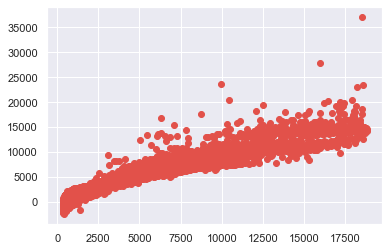

In [45]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values

y_pred = regression_model.predict(X_test)
plt.scatter(y_test['price'], y_pred)

Linear regression Performance Metrics:

intercept for the model: 10464.41229507241

R square on training data: 0.9079853166461038

R square on testing data: 0.90961736882177

RMSE on Training data: 1215.8035529418507

RMSE on Testing data: 1217.7789841914318

As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.

# Applying Scaling:

In [46]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [47]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [48]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.3099482756403942
The coefficient for cut is 0.029807168563817963
The coefficient for color is -0.14014342390803738
The coefficient for clarity is -0.20691660223026107
The coefficient for depth is -0.029388134584625848
The coefficient for table is -0.019834377910705556
The coefficient for x is -0.26643639636267974
The coefficient for y is 0.001963189065858508
The coefficient for z is -0.007607558891038941


From the above coefficients for each of the independent attributes we can conclude

The one unit increase in carat increases price by 1.309.

The one unit increase in cut increases price by 0.029.

The one unit increase in color decreases price by -0.140.

The one unit increase in clarity decreases price by -0.206.

The one unit increase in depth decreases price by -0.029.

The one unit increase in table decreases price by -0.019.

The one unit increase in x decreases price by -0.266.

The one unit increase in y increases price by 0.001.

The one unit increase in z decreases price by -0.007.

In [49]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3.372727111063385e-16


In [50]:
 # R square on training data
    
regression_model.score(X_train_scaled, y_train_scaled)

0.9079853166461038

In [51]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

# R square on testing data
regression_model.score(X_test_scaled, y_test_scaled)

0.9095517375865751

In [52]:
#RMSE on Training data

predicted_train=regression_model.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train))

0.3033392215884654

In [53]:
#RMSE on Testing data

predicted_test=regression_model.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test))

0.3007461760578592

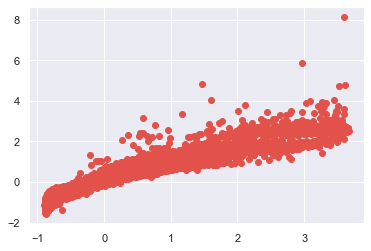

In [54]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values

y_pred = regression_model.predict(X_test_scaled)
plt.scatter(y_test_scaled['price'], y_pred)

Linear regression Performance Metrics after scaling:

intercept for the model: -3.372727111063385e-16

R square on training data: 0.9079853166461038

R square on testing data: 0.9095517375865751

RMSE on Training data: 0.3033392215884654

RMSE on Testing data: 0.3007461760578592

Now we can observe, by applying z score, the intercept became -3.372727111063385e-16. Earlier it was 10464.41229507241. The co-efficients have changed, the bias became nearly zero but the overall accuracy still same.

# Checking Multi-collinearity using VIF:

In [55]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [56]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1


carat ---> 81.9965147994894
cut ---> 8.816079322195941
color ---> 3.7338441287891766
clarity ---> 8.222615001314857
depth ---> 552.2803782634663
table ---> 545.7160162207532
x ---> 1137.4380325337129
y ---> 347.8056435342365
z ---> 386.2846814395833


We can observe there is very strong multi collinearity present in the data set. Ideally it should be within 1 to 5.

# Linear Regression using statsmodels:

In [57]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,1.10,1.0,1.0,6.0,63.3,56.0,6.53,6.58,4.15,4065
12108,1.01,2.0,0.0,6.0,64.0,56.0,6.30,6.38,4.06,5166
20181,0.67,1.0,5.0,4.0,60.7,61.4,5.60,5.64,3.41,1708
4712,0.76,1.0,3.0,5.0,57.7,63.0,6.05,5.97,3.47,2447
2548,1.01,3.0,3.0,3.0,62.8,59.0,6.37,6.34,3.99,6618


In [58]:
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept    10464.412295
carat        11054.457219
cut            107.388793
color         -329.602641
clarity       -502.959110
depth          -84.344773
table          -35.575558
x             -951.975419
y                6.672991
z              -42.135577
dtype: float64

In [59]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.065e+04
Date:                Fri, 01 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:51:50   Log-Likelihood:            -1.6062e+05
No. Observations:               18847   AIC:                         3.213e+05
Df Residuals:                   18837   BIC:                         3.213e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.046e+04    711.186     14.714      0.0

In [60]:
# Calculate MSE

mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [61]:
# Calculate MSE

mse1 = np.mean((lm1.predict(data_test.drop('price',axis=1))-data_test['price'])**2)

In [62]:
#Root Mean Squared Error - RMSE

np.sqrt(mse)

1215.8035529418498

In [63]:
#Root Mean Squared Error - RMSE

np.sqrt(mse1)

1217.7789841914305

In [64]:
# Prediction on Test data

y_pred = lm1.predict(data_test)

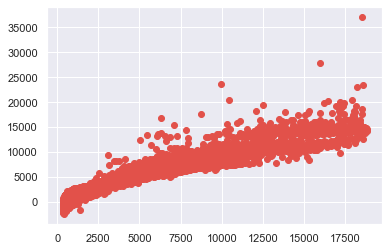

In [65]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [66]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(10464.41) * Intercept + (11054.46) * carat + (107.39) * cut + (-329.6) * color + (-502.96) * clarity + (-84.34) * depth + (-35.58) * table + (-951.98) * x + (6.67) * y + (-42.14) * z + 

After applying z score, the intercept became -3.372727111063385e-16. Earlier it was 10464.41229507241. The co-efficients have changed, the bias became nearly zero but the overall accuracy is still same. It means, model gives almost similar results with and without scaling.

Inferences:
    
* There is very strong multi collinearity present in the data set. When there is strong multi collinearity between the independent variables, the coefficients are poorly estimated, and the p-values are questionable.
* Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of our regression model. We might not be able to trust the p-values to identify independent variables that are statistically significant.
* In general, Cut, Color, Clarity, Carat and Width of the diamond plays an important role in deciding the price of the diamond.

As per the coefficient values obtained from above linear regression model, 

* When carat increases by 1 unit, diamond price increases by 11054.457 units, keeping all other predictors constant.
* When cut increases by 1 unit, diamond price increases by 107.388 units, keeping all other predictors constant.
* When y increases by 1 unit, diamond price increases by 6.672 units, keeping all other predictors constant.
* Colourless diamonds are more valuable and expensive than diamonds with a hint of colour. For every 1 unit increase in the colour the diamonds price decreases by -329.602 units.
* It appears variables 'depth' and 'table' have less significance in deciding the price of cubic zirconia diamonds.

As per model these five attributes are most important attributes 'Carat', 'Cut','clarity','color' and width i.e 'y' for predicting the price.

# Business insights and recommendations:

A gemstone company has approached us to predict the price of the cubic zirconia stones on the basis of the details given in the dataset, so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit shares. We used linear regression model using different techniques like with scaling and without scaling, using stats models to check R-squared, Adj. R-squared, P values to check the impact of variables on price.

Inferences and Business Recommendations:

* The five most important attributes in deciding the price of the diamond are Cut, Color, Clarity, Carat and Width of the diamond.
* For every 1 unit increase in carat, diamond price increases by 11054.457 units. It means as carat weight of cubic zirconia stones increase, the price of the stones too increase.
* For every 1 unit increase in cut, diamond price increases by 107.388 units. The 'Premium' cut of diamonds are the most expensive followed by 'Very Good cut'. According to the data, Ideal cut diamonds are most frequently bought diamonds by customers followed by Premium and very good cut diamonds.
* Business can encourage customers to buy Premium, ideal and very good cut diamonds since they are more profitable stones.
* For every 1 unit increase in y which is width of diamond, its price increases by 6.672 units. It means diamonds with higher width are more expensive and earn more profits for the company.
* As the length and height of the cubic zirconia stones increase, its price tends to decrease. This is because, if the height of diamond is too large, its ability to reflect the amount of light decreases. Hence stones with higher 'x' and 'z' values are lower in profitability.
* Colourless diamonds are more valuable and expensive than diamonds with a hint of colour. Diamonds with color 'J' are the most expensive followed by color 'I'.
* The Diamonds of VS1 & VS2 type of clarity are the most expensive. Better the clarity, more the price.